 # Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Load Data

### Data Attributes
This Dataset sourced by some unnamed institute.

Feature Explanation:


<mark>distance_from_home</mark> - the distance from home where the transaction happened.

<mark>distance_from_last_transaction</mark> - the distance from last transaction happened.

<mark>ratio_to_median_purchase_price</mark> - Ratio of purchased price transaction to median purchase price.

<mark>repeat_retailer</mark> - Is the transaction happened from same retailer.

<mark>used_chip</mark> - Is the transaction through chip (credit card).

<mark>used_pin_number</mark> - Is the transaction happened by using PIN number.

<mark>online_order</mark> - Is the transaction an online order.

<mark>fraud</mark> - Is the transaction fraudulent.

In [3]:
# Load the dataset
df = pd.read_csv("../../data/card_transdata.csv")

# Data Prev
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Explore Data

In [4]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print('Raw counts: \n')
print(df['fraud'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df['fraud'].value_counts(normalize=True))

Raw counts: 

0.0    912597
1.0     87403
Name: fraud, dtype: int64
-----------------------------------
Normalized counts: 

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64


<AxesSubplot:>

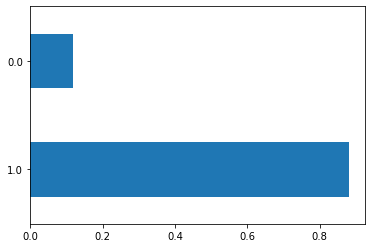

In [14]:
df.repeat_retailer.value_counts(1).plot.barh()

0.0    912597
1.0     87403
Name: fraud, dtype: int64


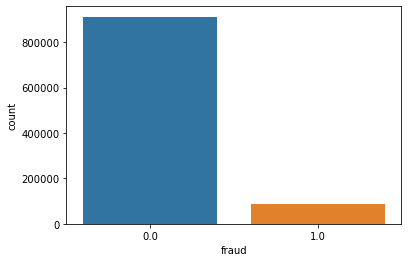

In [6]:
# Visualization of the numbers above
ax=sns.countplot (x=df['fraud'], data=df)
print(df['fraud'].value_counts())

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64


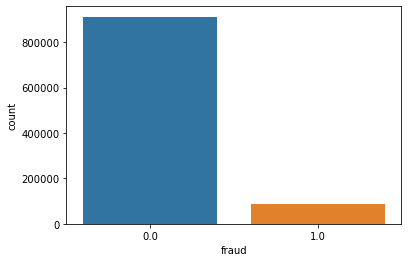

In [7]:
# Visualization of the numbers above
ax=sns.countplot (x=df['fraud'], data=df)
print(df['fraud'].value_counts(normalize=True))

### Data is imbalanced
more than 91% of data are Genuine transactions
more than 8% of data are Fraud transactions

Accuracy is a not a good metric for imbalance data set. It won't provide a great picture for the model's overall performance. In imbalanced data sets, the model can predict the majority class and achieve a high score. Aka it's seen more of the majority class and it will simply predict that, in this case it can predict genuine 100% and will be correct 91% of the time. However, it ignore approximately 9% of the time and that 9% is very significant because those are false negative which can cost a lot of money to the firm. 

Example: a fraud transaction is called genuine, where the transaction withdraw $50 dollars from a random bank customer. Not only did the customer lose 50 bucks, it also lost the trust to the bank. This is a lost lost situation. Imagine a bigger number, let's say 1 million. How would you feel?

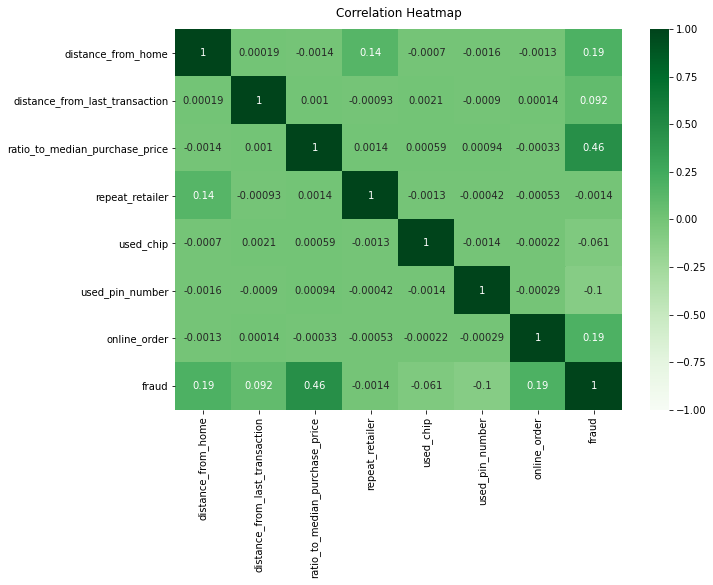

In [8]:
# check for covariance
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='Greens')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)
plt.show()

In [9]:
# Define appropriate X and y
y = df['is_attributed']
X = df[['ip', 'app', 'device', 'os', 'channel']]
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

KeyError: 'is_attributed'

# Preprocess Data

# Visualize Data